# SOM
http://peterwittek.com/somoclu-in-python.html

In [3]:
import os, numpy as np, pandas as pd
file = os.sep.join(['seeds_dataset.txt'])
data = pd.read_csv(file, sep="\t", header=None, names=["Area", "Perimeter", "Compactness", "Length of Kernel","Width of Kernel","Asymmetry coefficient"," Length of kernel groove","Label"])

#data=data.drop(columns=['h'])
data.head()

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry coefficient,Length of kernel groove,Label
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import somoclu
%matplotlib inline 
###################
c1 = list(data['Area'].values)
c2 = list(data['Perimeter'].values)
c3 = list(data['Compactness'].values)
c4 = list(data['Length of Kernel'].values)
c5 = list(data['Width of Kernel'].values)
#data_somo = np.float32(np.concatenate((c1, c2, c3)))
data_somo=[]
for i in range(0, len(c1)):
    data_somo.append([c1[i],c2[i]])
data_somo=np.array(data_somo)
#print(data_somo)
colors = ["red"] * 70
colors.extend(["green"] * 70)
colors.extend(["blue"] * 70)
#fig = plt.figure()
#ax = Axes3D(fig)
#ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors)
#ax.scatter(c1,c2)
#labels = range(150)
labels =np.array(data['Label'].values)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [32]:
n_rows, n_columns = 100, 160 #choose your depth
som = somoclu.Somoclu(n_columns, n_rows, data=data_somo)
%time som.train()

CPU times: user 12.1 s, sys: 23.7 ms, total: 12.2 s
Wall time: 1.6 s


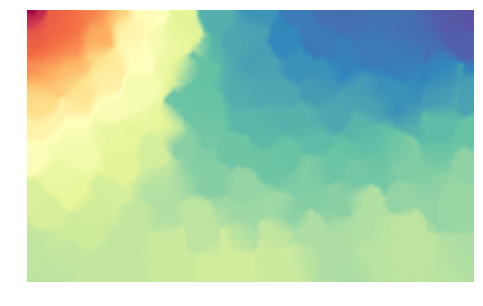

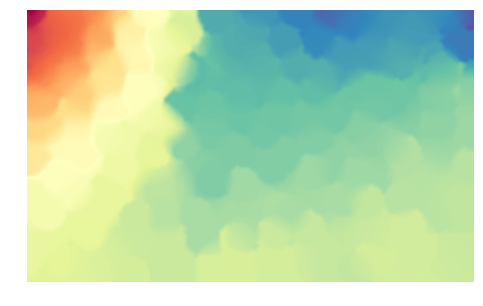

<module 'matplotlib.pyplot' from '/home/mandala/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [33]:
som.view_component_planes()

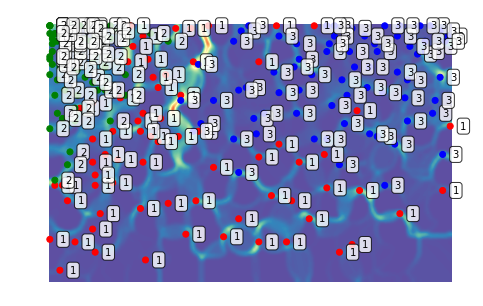

<module 'matplotlib.pyplot' from '/home/mandala/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [35]:
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)

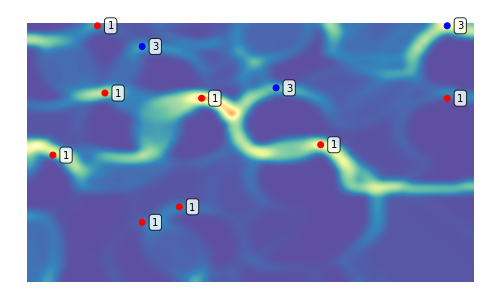

<module 'matplotlib.pyplot' from '/home/mandala/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [38]:
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels,zoom=((50, n_rows), (100, n_columns)))

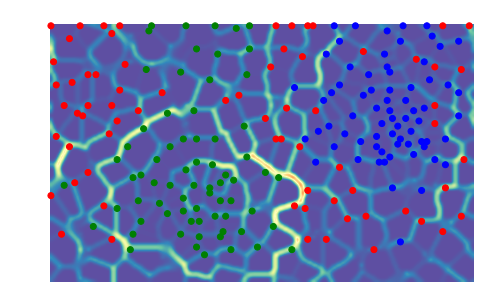

<module 'matplotlib.pyplot' from '/home/mandala/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [40]:
som = somoclu.Somoclu(n_columns, n_rows, maptype="toroid",
                      compactsupport=False)
som.train(data_somo)
som.view_umatrix(bestmatches=True, bestmatchcolors=colors)